# Guide to Data Fitting in Python

<div class="overview admonition"> 
<p class="admonition-title">Overview</p>

Questions:

* How can I use Python to fit a linear model?

* How can I use Python to fit arbitrary functional forms to data?

* What libraries can be used for data fitting, and what are the differences between them?

Objectives:

* Introduce different libraries that can be used for data fitting and the differences between them.

* Fit a model using NumPy polyfit.

* Fit a model using SciPy linregress.

* Fit a model using statsmodels.

* Fit a model using scikit-learn.

* Fit an arbitrary functional form to data using SciPy curve_fit.

</div>

## Purpose of this lesson
This lesson will demonstrate how to fit models to data using Python.
We will explore different libraries that can be used for linear fitting and show the different ways to fit a linear model using these libraries.
This lesson is aimed at educators who want to teach students how to fit models to data using Python, and its purpose is to provide an overview of the different libraries available for data fitting, the differences between them, and what kind of fitting can be done with each option..

## Choosing the Right Python Library for Fitting

In this section, we will explore different Python libraries that can be used for fitting models.
As with most tasks when programming, there are many ways to achieve the same goal.
When it comes to fitting a model, you have several options.
The approach you choose will depend on the complexity of the code you'd like to write and the statistical information you need. 

Below are some common Python libraries used for linear fitting.
They are generally ordered from simplest to most complex in terms of use and the statistical information they provide.

### NumPy (`polyfit`)

- **What is it?**: NumPy is a fundamental package for numerical computing in Python. The [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function can be used to fit polynomial functions of specified degree. 
- **When to use it?**: Use the `np.polyfit` function when you need a simple linear fit or if you are doing a polynomial fit. It can be especially useful if you are already working with NumPy and do not want to add extra dependencies to your lesson. 

### SciPy (`linregress`)

- **What is it?**: SciPy is a Python library used for scientific and technical computing. The `linregress` function from SciPy provides a quick way to perform linear regression. It returns important statistics such as the slope, intercept, correlation coefficient, p-value, and standard error of the regression, which can be helpful for straightforward analyses.
- **When to use it?**: Use `linregress` when you need a fast way to perform linear regression with some basic statistical insights. It's perfect for educational purposes where you want to demonstrate the basics of regression analysis or when dealing with simpler datasets where advanced statistical models are not required.

### Statsmodels

- **What is it?**: Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. The formula API allows for specifying models using R-style formulas.
- **When to use it?**: Choose statsmodels when you need more detailed statistical information about the model, such as p-values, confidence intervals, and diagnostic tests. This is particularly useful in research settings or when you need to substantiate your findings statistically.

### SciKit Learn

- **What is it?**: Scikit-learn is a free machine learning library for Python. It features various classification, regression, and clustering algorithms. It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. 
- **When to use it?**: Use scikit-learn when you might be interested in exploring more advanced machine learning models beyond linear regression. 

## Fitting Linear Models to Data

In the first section, we consider "linear models" to be models where the relationship between the independent and dependent variables is linear. This means that the dependent variable can be expressed as a linear combination of the independent variables.
This might encompass linear regression, but can also apply to polynomial regression, where the relationship between the variables is still linear, even if the model itself is polynomial. 
Our example data happens to be one that can be fit with linear regression. However, the many concepts in this lesson can be applied to other functional forms.

A common exercise in introductory chemistry is fitting a linear model to absorbance measurements at a particular wavelength vs. concentration of an analyte using spectrophotometry. 
In these cases, the absorbance of a sample is described using [Beer-Lambert Law](https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law)

$$
A = \varepsilon \cdot l \cdot c
$$

where $A$ is the absorbance, $\varepsilon$ is the absorptivity constant, $l$ is path length, and $c$ is the concentration of the sample.

In the first section of this notebook, we will read in absorbance data, fit a linear model, and calculate the concentrations of unknowns using our model using many different Python libraries.

The cell below imports the libraries we will use for our analysis. 

In [1]:
import pandas as pd # for reading data from a file and putting in a table
import matplotlib.pyplot as plt # for plotting

import seaborn as sns # for making plots look nice
# apply the seaborn theme to plots
sns.set_theme()

For this lesson, the data we are working with represents absorbance data recorded in a Bradford Assay for determining protein concentration.

After we have imported our libraries, we will next use `pandas` to read in our data.
Our data is stored in a comma separated value (CSV) file, though pandas can also read from Excel files.

In the example in this notebook, we are reading the CSV directly from a web URL instead of from a local file.

In [2]:
# Read in file - reading a CSV from a web url.
df = pd.read_csv("https://raw.githubusercontent.com/MolSSI-Education/python-experimental-chem/main/data/protein_assay.csv")

# View the first five rows.
df.head()

,concentration,absorbance
0,0.2,0.285
1,0.4,0.485
2,0.6,0.621
3,0.8,0.799
4,1.0,1.010


### Visualizing Data

After reading in our data, we might wish to inspect it visually. 
We can do this using `matplotlib`.

Text(0, 0.5, 'Absorbance')

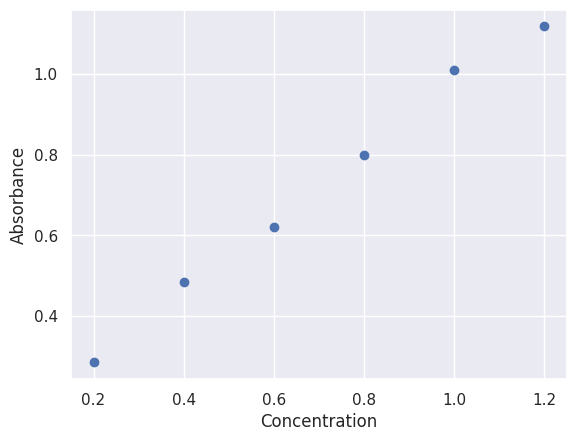

In [3]:
# Plot the data
plt.scatter(df['concentration'], df['absorbance'])
plt.xlabel('Concentration')
plt.ylabel('Absorbance')

## Fitting using NumPy Polynomials

The [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function in NumPy can be used to fit polynomial models. 
When fitting a polynomial using NumPy, you specify the degree of the polynomial you would like to fit as well as your x and y data.


In [4]:
import numpy as np

In [5]:
x_data = df["concentration"]
y_data = df["absorbance"]

my_fit = np.polyfit(x_data, y_data, deg=1, full=True)
coeff = my_fit[0]
fit_data = my_fit[1:]

print(f"The fit slope is {coeff[0]} and the y-intercept is {coeff[1]}")

The fit slope is 0.8454285714285718 and the y-intercept is 0.12786666666666668


Measures like the $R^2$ value, which is a measure of how well the model fits the data, are not directly available when using `polyfit`.
However, you can calculate the $R^2$ value by hand using the residuals, though we will not show it here.



NumPy allows you to create a polynomial function from your fit that you can use to predict new values.

In [6]:
# create a polynomial function from fit values
poly_fit = np.poly1d(coeff)

predicted = poly_fit(x_data)
print(predicted)

[0.29695238 0.4660381  0.63512381 0.80420952 0.97329524 1.14238095]


The cell below shows a plot of the data and the polynomial fit using NumPy's `polyfit` function.

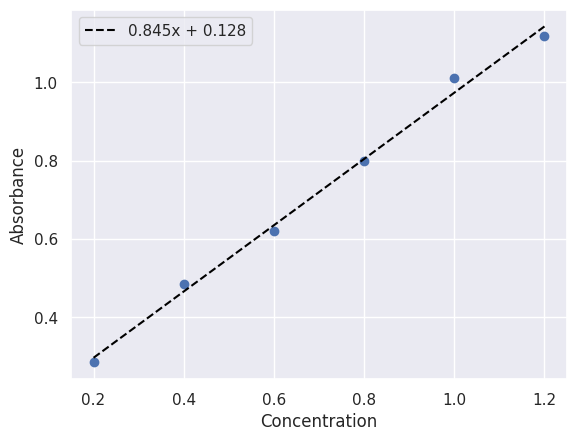

In [7]:
fit_label = f"{coeff[0]:.3f}x + {coeff[1]:.3f}"

plt.scatter(x_data, y_data)
plt.plot(x_data, predicted, color="black", linestyle="--", label=fit_label)
plt.xlabel("Concentration")
plt.ylabel("Absorbance")
plt.legend()

Note that an advantage of using `polyfit` is that we could also easily try fitting a higher-order polynomial to the data if we wanted to.
This can be an advantage if you are not sure what the best model is for your data.

## Fitting a Linear Model using `scipy.linregress`

The [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function from SciPy can be used to perform linear regression.
This method is best if you are sure that your data is linear and you need simple statistics such as the slope, intercept, and correlation coefficient.


In [8]:
from scipy import stats

lin_fit = stats.linregress(x_data, y_data)

fit_label = f"{lin_fit.slope:.3f}x + {lin_fit.intercept:.3f}\n"

print(f"Fit equation: {fit_label}")


Fit equation: 0.845x + 0.128



SciPy `linregress` does not provide a built-in way to calculate predictions from the model, but you can easily calculate these by hand using the slope and intercept values returned by the function.

In [9]:
# get predicted y values
predicted = lin_fit.slope * x_data + lin_fit.intercept
print(predicted)

0    0.296952
1    0.466038
2    0.635124
3    0.804210
4    0.973295
5    1.142381
Name: concentration, dtype: float64


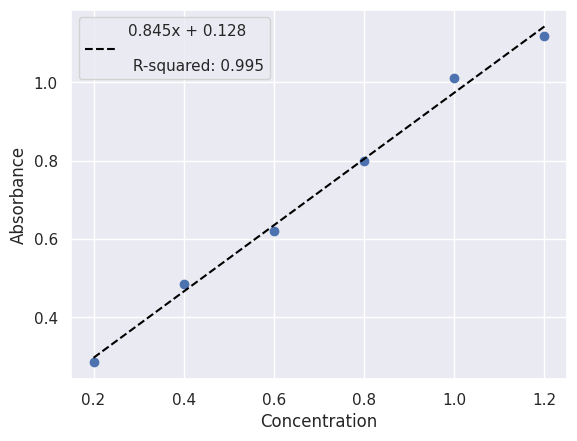

In [10]:
fit_label += "\n R-squared: " + f"{lin_fit.rvalue**2:.3f}"
plt.scatter(x_data, y_data)
plt.plot(x_data, predicted, color="black", linestyle="--", label=fit_label)
plt.xlabel("Concentration")
plt.ylabel("Absorbance")
plt.legend()

## Fitting a Linear Model using `statsmodels`

To fit a linear equation to our data, we can also use a library called [statsmodels](https://www.statsmodels.org/stable/index.html). 
`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In particular, we are using a part of `statsmodels` called the formula API.
The formula API lets you define a formula as a string for fitting and is specifically designed to work with dataframes.
When defining a formula, you use the column names in a string to define the relationship.
Note that the column names should not have spaces, or entering the relationship is a bit more complicated.

For example, if you have a dataframe `df` with columns `x` and `y`, you can define a formula for a linear model as `y ~ x`. 
As a slightly more complicatd example one could also fit something like a polynomial using `"y ~ np.power(x, 2) + x"` if you had imported NumPy (`import numpy as np`). 

To use the formula API, we will use `smf` (imported in first cell). 
We will use ordinary least squares (`ols`) for our fit, though [a number of other options are offered](https://www.statsmodels.org/dev/api.html#statsmodels-formula-api).


In [11]:
import statsmodels.formula.api as smf

In [12]:
regression = smf.ols("absorbance ~ concentration", data=df).fit()

We can see a summary of the fit including the `R-squared` by using the `.summary()` method.

In [13]:
regression.summary()

/home/janash/miniconda3/envs/iqb-2024/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             absorbance   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     749.4
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.06e-05
Time:                        01:12:58   Log-Likelihood:                 14.638
No. Observations:                   6   AIC:                            -25.28
Df Residuals:                       4   BIC:                            -25.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1279      0.024      5.316      0.006       0.061       0.195
concentration     0.8454      0.031     27.374      0.000       0.760       0.931
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.852
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.692
Skew:                           0.659   Prob(JB):                        0.708
Kurtosis:                       1.984   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
regression.params

Intercept        0.127867
concentration    0.845429
dtype: float64

We can see what our model predicts for our input concentration values by using the `predict` method.

In [15]:
statsmodel_predicted = regression.predict()

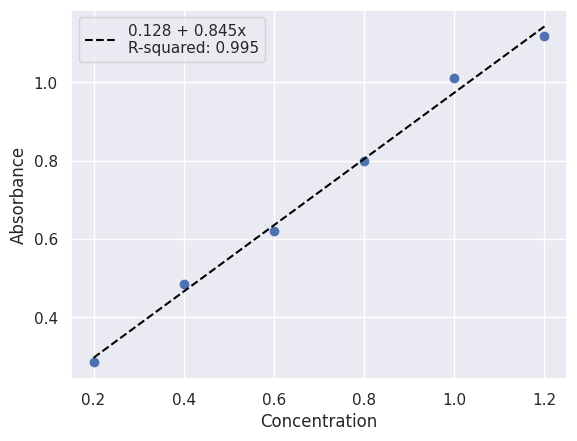

In [16]:
fit_label = f"{regression.params.Intercept:.3f} + {regression.params.concentration:.3f}x\n"
fit_label += f"R-squared: {regression.rsquared:.3f}"

plt.scatter(x_data, y_data)
plt.plot(x_data, predicted, color="black", linestyle="--", label=fit_label)
plt.xlabel("Concentration")
plt.ylabel("Absorbance")
plt.legend()

## Fitting a Linear Model using `scikit-learn`

The final library we will use to fit a linear model is `scikit-learn`.
`scikit-learn` is a free machine learning library for Python that features various classification, regression, and clustering algorithms. Conveniently, SciKit-Learn also uses a particular format for its models that allows you to switch out models.

In this notebook, we will see how to use scikitlearn to fit chemical data to linear models. However, the concepts outlined here will be relevant to fitting data to other models.

In [17]:
from sklearn.linear_model import LinearRegression # import the linear regression model

In [18]:
linear_model = LinearRegression()

We now need to get our data in a format that is friendly for Scikit-learn. 
So far, we have been working with data that are single pandas columns (also called a Series), but scikit-learn requires a NumPy array or a pandas DataFrame.
One way we can get our data into the right format is to use double brackets when selecting our columns from the DataFrame.

In [19]:
x_data = df[["concentration"]] # use double brackets to make it a 2D array
y_data = df[['absorbance']] # use double brackets to make it a 2D array

linear_model.fit(x_data, y_data)

LinearRegression()

After `fit` is called, the model is trained on the data. Usually, when using SciKit Learn models, you wouldn't really "print" out the model coefficients, but we are doing so here for demonstration purposes.
Instead, you would use the trained model to predict new values based on the model fit.

In [20]:
# print model fit
print(f"Scikit Learn Fit: {linear_model.coef_[0][0]:.3f}x + {linear_model.intercept_[0]:.3f}")

# print the model score
print(f"R-squared: {linear_model.score(x_data, y_data):.3f}")

Scikit Learn Fit: 0.845x + 0.128
R-squared: 0.995


Usually a trained SciKit Learn model is used for prediction (as shown below), instead of for printing out the coefficients.

In [21]:
model_predictions = linear_model.predict(x_data)

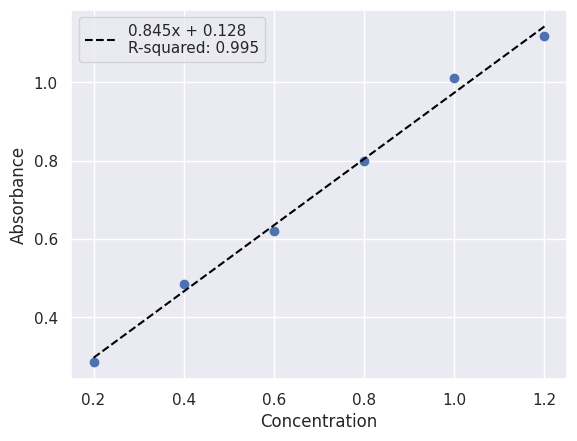

In [22]:
fit_label = f"{linear_model.coef_[0][0]:.3f}x + {linear_model.intercept_[0]:.3f}\n"
fit_label += f"R-squared: {linear_model.score(x_data, y_data):.3f}"

plt.scatter(x_data, y_data)
plt.plot(x_data, model_predictions, color="black", linestyle="--", label=fit_label)
plt.xlabel("Concentration")
plt.ylabel("Absorbance")
plt.legend()

## Fitting Nonlinear Models with SciKit Learn

All scikit learn models use the same API, or interface. This means to switch from a linear model to a more sophisticated model like a random forest model, one need only change the model creation.

For example, recall our code to fit a linear model and use it for prediction:

```python
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X,Y)
predictions = model.predict(X)
To do the same thing with a random forest regresso, the code would be:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, Y)
predictions = model.predict()
```

This makes SciKit Learn especially appropriate if you are interested in exploring more advanced machine learning models beyond linear regression.

## Fitting Arbitrary Functional Forms to Data

In the previous sections, we fit linear models to data including linear and polynomial fits.
However, there are times when it will be beneficial to fit data to arbitary functional forms that may not represent linear relationships between the independent and dependent variables.

One example of this type of function is Gaussian distribution. 
To see how to use SciPy `curve_fit` to fit arbitrary functional forms (example Gaussian) to data, see this [Data Fitting lesson](https://education.molssi.org/python-data-analysis/03-data-fitting/index.html).